# Reading data from Cassandra database

Hay que instalar ciertos modulos antes de poder utilizarlo

imf@imf-vm:~/$ su
Contraseña:
root@imf-vm:/home/imf/# 

conda install -c conda-forge cassandra-driver

#Si se quiere ejecutar con pip install => conda install -c conda-forge pip  



In [2]:
# Imports modules to process data
#requires to install first pip
# pip install cassandra-driver
# pip install pandas
# conda install numpy 
# conda install numpy 
from cassandra.cluster import Cluster
import pandas as pd
import numpy as np
import statsmodels as st
import datetime as datetime

%pylab inline
import warnings; warnings.simplefilter('ignore')


Populating the interactive namespace from numpy and matplotlib


Nos conectamos con el cluster de cassandra creado (en este caso un standalone server)

In [3]:
cluster = Cluster(['127.0.0.1'],port=9042)
session = cluster.connect('datos')


Definimos los métodos para construir un dataframe durante la importación.

In [4]:
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

session.row_factory = pandas_factory
session.default_fetch_size = None

Primera vez: Leemos todos datos se sensorTH y cerramos la conexión

In [5]:
datossensor = session.execute('SELECT * FROM sensors limit 10')

In [6]:
print(datossensor._current_rows)

  devicename serverid                   fecha    id  value
0    device6  KafkaGW 2018-06-03 23:17:07.759  5700    6.3
1    device6  KafkaGW 2018-06-03 23:17:09.757  5700    5.3
2    device6  KafkaGW 2018-06-03 23:17:11.757  5700    5.6
3    device6  KafkaGW 2018-06-03 23:17:13.755  5700    5.3
4    device6  KafkaGW 2018-06-03 23:17:15.760  5700    4.7
5    device6  KafkaGW 2018-06-03 23:17:17.756  5700    4.2
6    device6  KafkaGW 2018-06-03 23:17:19.754  5700    4.6
7    device6  KafkaGW 2018-06-03 23:17:21.755  5700    4.7
8    device6  KafkaGW 2018-06-03 23:17:23.757  5700    4.6
9    device6  KafkaGW 2018-06-03 23:17:25.756  5700    4.6


Leemos todos los datos iniciales y lo guardamos en el pandas

In [7]:
datossensor = session.execute('SELECT * FROM sensors')
SensorTHdf = datossensor._current_rows

In [8]:
#Cerramos la session hacia cassandra.
session.shutdown()

Veamos algunos ploteos básicos de la información

In [9]:
#b=SensorTHdf.tz_convert('Europe/Madrid')
df=SensorTHdf

Vamos a convertirlo en un datatime de pandas.

In [13]:
df = df.set_index(pd.DatetimeIndex(df['fecha']))
dt=df[['devicename','serverid','value']]
dt=dt.tz_localize('Etc/UTC')
dt=dt.tz_convert('Europe/Madrid')

Algunos datos y visualización

In [14]:
df.head()

,devicename,serverid,fecha,id,value
fecha,,,,,
2018-06-03 23:17:07.759,device6,KafkaGW,2018-06-03 23:17:07.759,5700,6.3
2018-06-03 23:17:09.757,device6,KafkaGW,2018-06-03 23:17:09.757,5700,5.3
2018-06-03 23:17:11.757,device6,KafkaGW,2018-06-03 23:17:11.757,5700,5.6
2018-06-03 23:17:13.755,device6,KafkaGW,2018-06-03 23:17:13.755,5700,5.3
2018-06-03 23:17:15.760,device6,KafkaGW,2018-06-03 23:17:15.760,5700,4.7


In [26]:
dtmadrid=dt.loc[dt['ciudad'] == 1][['temmax', 'tempmin']]
dtbarcelona=dt.loc[dt['ciudad'] == 2][['temmax', 'tempmin']]

serverid
KafkaGW     AxesSubplot(0.125,0.2;0.775x0.68)
KafkaGW2    AxesSubplot(0.125,0.2;0.775x0.68)
Name: value, dtype: object

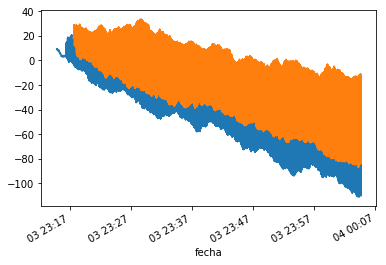

In [16]:
df.groupby('serverid')['value'].plot()

devicename
device1     AxesSubplot(0.125,0.2;0.775x0.68)
device10    AxesSubplot(0.125,0.2;0.775x0.68)
device11    AxesSubplot(0.125,0.2;0.775x0.68)
device12    AxesSubplot(0.125,0.2;0.775x0.68)
device13    AxesSubplot(0.125,0.2;0.775x0.68)
device14    AxesSubplot(0.125,0.2;0.775x0.68)
device15    AxesSubplot(0.125,0.2;0.775x0.68)
device16    AxesSubplot(0.125,0.2;0.775x0.68)
device17    AxesSubplot(0.125,0.2;0.775x0.68)
device18    AxesSubplot(0.125,0.2;0.775x0.68)
device19    AxesSubplot(0.125,0.2;0.775x0.68)
device2     AxesSubplot(0.125,0.2;0.775x0.68)
device20    AxesSubplot(0.125,0.2;0.775x0.68)
device3     AxesSubplot(0.125,0.2;0.775x0.68)
device4     AxesSubplot(0.125,0.2;0.775x0.68)
device5     AxesSubplot(0.125,0.2;0.775x0.68)
device6     AxesSubplot(0.125,0.2;0.775x0.68)
device7     AxesSubplot(0.125,0.2;0.775x0.68)
device8     AxesSubplot(0.125,0.2;0.775x0.68)
device9     AxesSubplot(0.125,0.2;0.775x0.68)
Name: value, dtype: object

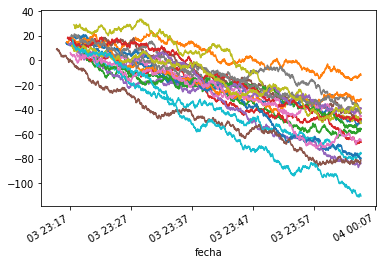

In [17]:
df.groupby('devicename')['value'].plot()